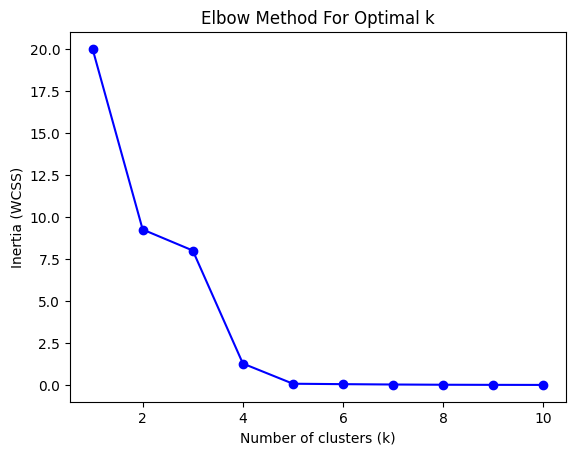

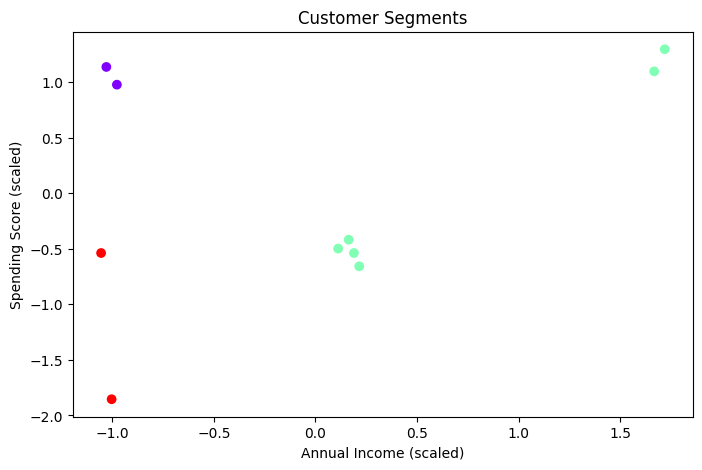

   CustomerID  Annual Income (k$)  Spending Score  Cluster
0           1                  15              39        2
1           2                  16              81        0
2           3                  17               6        2
3           4                  18              77        0
4           5                  60              40        1
5           6                  62              42        1
6           7                  63              39        1
7           8                  64              36        1
8           9                 120              80        1
9          10                 122              85        1


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample customer data
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Annual Income (k$)': [15, 16, 17, 18, 60, 62, 63, 64, 120, 122],
    'Spending Score': [39, 81, 6, 77, 40, 42, 39, 36, 80, 85]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score']]

# Optional: Normalize data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use Elbow Method to find optimal k
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with optimal k (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the Clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments')
plt.show()

# Print clustered data
print(df)
